In [1]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.llg_auction import LLGAuction
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.poga import POGA
from src.learner.soda import SODA

In [2]:
# parameter mechanism
bidder = ['L', 'L', 'G']
o_space = {'L':[0,1], 'G':[0,2]}
a_space = {'L':[0,1], 'G':[0,2]}

param_prior = {
    'distribution':'uniform',
    'corr': 0.7
    }

param_util ={
    'payment_rule': 'NB',
    'tie_breaking': 'local',
            }

# parameter approximation game
n = 64
m = 64

# create mechanism
mechanism = LLGAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)


**Learner**
Specify Learning Algorithm

In [3]:
# parameter learner
max_iter = int(2e3)
tol = 1e-6
stop_criterion = 'util_loss'
steprule_bool = True
eta = 50
beta = 1/20

#learner = SODA(max_iter, tol, stop_criterion, steprule_bool, eta, beta)
learner = FrankWolfe(max_iter, tol, stop_criterion)
#learner = POGA(max_iter, tol, stop_criterion, steprule_bool, eta, beta)

Run Learning Algorithm

In [6]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')
    
# run soda
learner.run(mechanism, game, strategies, disable_tqdm=False, print=True)

 22%|████▎               | 431/2.00k [00:21<01:16, 20.4it/s] 

Convergence after 431 iterations
Value of stopping criterion (util_loss) 0.0


The algorithm is much slower because valuations are interdepent which leads to more complex (more expensive) calculations in the computation of the gradient.

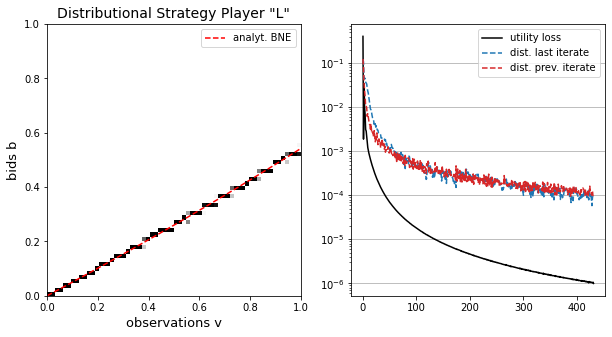

In [7]:
agent = 'L'
x = strategies[agent].o_discr
bne = mechanism.get_bne(agent, x)
strategies[agent].plot(True, bne)

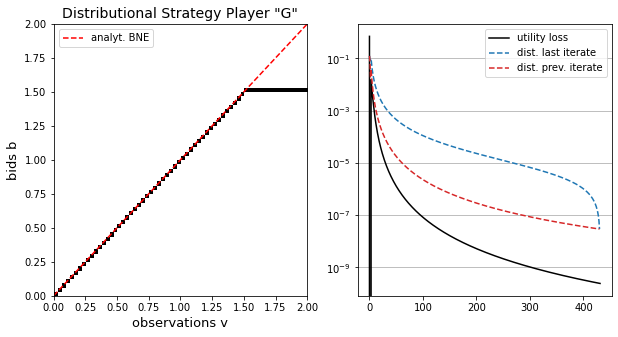

In [8]:
agent = 'G'
x = strategies[agent].o_discr
bne = mechanism.get_bne(agent, x)
strategies[agent].plot(True, bne)